In [1]:
import sympy as sym
from sympy.polys import subresultants_qq_zz

sym.init_printing()

In [2]:
assert sym.__version__ == '1.1.1'

In [3]:
import imp
bezout = imp.load_source('bezout', '../src/cayley_bezout.py')

Bezout's Resultant
------------------

The Bezout matrix is a special square matrix associated with two polynomials, introduced by Sylvester (1853) and Cayley (1857) and named after Étienne Bézout. Bézoutian may also refer to the determinant of this matrix, which is equal to the resultant of the two polynomials.

The entries of Bezout matrix are bilinear functions of coefficients of the given polynomials. The Bezout formulation has gone over different generalizations. The most common one is the Cayley that is used after for the Dixon  formulation as well.

$$\left|\begin{matrix}
p(x) & q(x)\cr
p(a)& q(a)
\end{matrix}%
\right|= \Delta(x, a)$$

$\Delta(x, a)$ is the determinant of the matrix.

We have the polynomial:

$$ \delta(x, a) = \frac{\Delta(x,a)}{x-a}$$

The Bezout matrix is highly related to the Sylvester matrix and the greatest common divisor of polynomials. Unlike in Sylvester's formulation, where the resultant of $p$ and $q$ is the determinant of an $(m + n) \times (m + n)$ matrix, in the Cayley formulation, the resultant is obtained
as the determinant of a $n \times n$ matrix.

Example: Generic example
------------------------

The Python library [SympPy](http://www.sympy.org/en/index.html) offers an implementation of the Bezout's matrix.

An implementation has also been created for the purpose of [this work](https://github.com/Nikoleta-v3/resultant-theory/blob/packaging/src/cayley_bezout.py). Both formulations are used to
verify the results.

In [4]:
b_3, b_2, b_1, b_0 = sym.symbols("b_3, b_2, b_1, b_0")
x = sym.symbols('x')

In [5]:
b = sym.IndexedBase("b")

In [6]:
p = sym.lambdify(x, b_2 * x ** 2 + b_1 * x + b_0)
q = sym.lambdify(x, sym.diff(p(x), x))

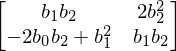

In [7]:
bezout.cayley_bezout_matrix(p, q, x)

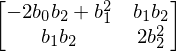

In [8]:
subresultants_qq_zz.bezout(p(x), q(x), x)

We can verify that the implementations' results match.

Example: Existence of common roots
------------------------------------------

Note that if the system has a common root we are expecting the resultant/determinant to equal to zero.

**A commot root exists.**

In [30]:
# example one
p = sym.lambdify(x, x**3 +1)
q = sym.lambdify(x, x + 1)

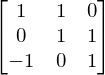

In [19]:
bezout.cayley_bezout_matrix(p, q, x)

In [20]:
bezout.cayley_bezout_matrix(p, q, x).det()

In [37]:
# example two
p = sym.lambdify(x, x ** 2 - 5 * x + 6)
q = sym.lambdify(x, x ** 2 - 3 * x + 2)

In [38]:
a = sym.symbols('alpha')

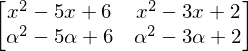

In [39]:
matrix = sym.Matrix([[p(x), q(x)], [p(a), q(a)]])
matrix

In [41]:
subresultants_qq_zz.bezout(p(x), q(x), x).det()

In [43]:
bezout.cayley_bezout_matrix(p, q, x).det()

**A common root does not exist.**

In [21]:
z = sym.lambdify(x, x ** 2 - 7 * x + 12)
h = sym.lambdify(x, x ** 2 - x)

In [22]:
bezout.cayley_bezout_matrix(z, h, x).det()

Example: Two variables, eliminator
----------

When we have system of two variables we solve for one and the second is kept as a coefficient.Thus we can find the roots of the equations, that is why the resultant is often refeered to as the eliminator.

In [44]:
y = sym.symbols('y')

In [45]:
f = sym.lambdify(y, x ** 2 + x * y + 2 * x + y -1)
g = sym.lambdify(y, x ** 2 + 3 * x - y ** 2 + 2 * y - 1)
f(x), g(x)

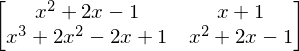

In [46]:
bezout.cayley_bezout_matrix(f, g, y)

In [47]:
bezout.cayley_bezout_matrix(f, g, y).det().factor()

Dixon's Resultant
-----------------

Dixon (1908) showed how to extend this formulation to $m = 3$ polynomials in $n = 2$ variables.

In a similar manner but this time,

$$\left|\begin{matrix}
p(x, y) & q(x, y) & h(x, y) \cr
p(a, y) & q(a, y) & h(b, y) \cr
p(a, b) & q(a, b) & h(a, b)
\end{matrix}%
\right|= \Delta(x, y, \alpha, \beta)$$

Thus, we have the polynomial:

$$ \delta(x,y, \alpha, \beta) = \frac{\Delta(x, y, \alpha, \beta)}{(x-\alpha)(y - \beta)}$$

In [48]:
from sympy.polys.monomials import itermonomials
import numpy as np
import functools

Example: Generic example of Dixon (n=2, m=3)
---------------------------------------------------

In [52]:
dixon = imp.load_source('dixon', '../src/dixon.py')

In [53]:
a_1, a_2, b_1, b_2, u_1, u_2, u_3 = sym.symbols('a_1, a_2, b_1, b_2, u_1, u_2, u_3')

In [54]:
a, b = sym.symbols('alpha, beta')

In [55]:
p = sym.lambdify((x, y), a_1 * x ** 2 * y ** 2 + a_2 * x ** 2)
q = sym.lambdify((x, y), b_1 * x ** 2 * y ** 2 + b_2 * y ** 2)
h = sym.lambdify((x, y), u_1 * x + u_2 * y + u_3)

In [57]:
D = dixon.DixonResultant(variables=[x, y], polynomials=[p, q, h])

In [58]:
poly = D.get_dixon_polynomial()

In [59]:
matrix = D.get_dixon_matrix(poly)

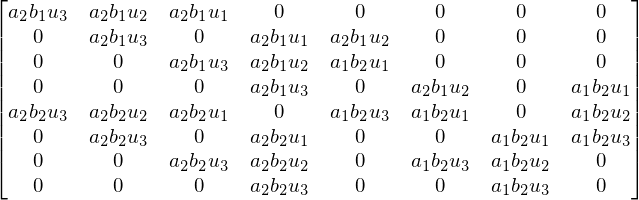

In [60]:
matrix

In [61]:
matrix.det().factor()

Dixon's General Case
--------------------

[Yang et al.](https://rd.springer.com/chapter/10.1007/3-540-63104-6_11) generalized the Dixon resultant method of three polynomials with two variables to the system of $n+1$ polynomials with $n$ variables.

Example: Numerical example
--------------------

In [65]:
p = sym.lambdify((x, y), x + y)
q = sym.lambdify((x, y), x ** 2 + y **3)
h = sym.lambdify((x, y), x ** 2 + y)

In [66]:
d = dixon.DixonResultant([p, q, h], (x, y))

In [67]:
poly = d.get_dixon_polynomial()
poly

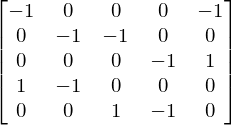

In [68]:
matrix = d.get_dixon_matrix(polynomial=poly)
matrix

In [69]:
matrix.det()

Example: Generic example
---------

In [70]:
a, b, c = sym.symbols('a, b, c')

In [71]:
p_1 = sym.lambdify((x, y), a * x ** 2 + b * x * y + (b + c - a) * x + a * y + 3 * (c - 1))
p_2 = sym.lambdify((x, y), 2 * a ** 2 * x ** 2 + 2 * a * b * x * y + a * b * y + b ** 3)
p_3 = sym.lambdify((x, y), 4 * (a - b) * x + c * (a + b) * y + 4 * a * b)
p_3(x, y)

In [72]:
polynomials = [p_1, p_2, p_3]

In [73]:
example_two = dixon.DixonResultant(polynomials, [x, y])

In [74]:
poly = example_two.get_dixon_polynomial()

In [75]:
coeff = D.get_coefficients_of_alpha(poly)

In [76]:
size = len(poly.monoms())
size

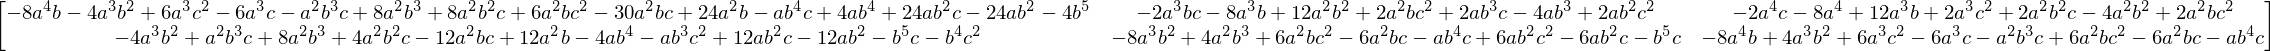

In [77]:
matrix = example_two.get_dixon_matrix(poly)
matrix

Example: 
--------------------------------------------------------------------------------------------------
**From [Dixon resultant’s solution of systems of geodetic polynomial equations](https://rd.springer.com/content/pdf/10.1007%2Fs00190-007-0199-0.pdf)**


In [78]:
z = sym.symbols('z')

In [79]:
f = sym.lambdify((y, z), x ** 2 + y ** 2 - 1 + z * 0)
g = sym.lambdify((y, z), x ** 2 + z ** 2 - 1 + y * 0)
h = sym.lambdify((y, z), y ** 2 + z ** 2 - 1)

In [80]:
d = dixon.DixonResultant([f, g, h], [y, z])

In [81]:
poly = d.get_dixon_polynomial()

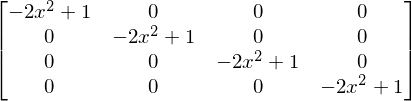

In [84]:
matrix = d.get_dixon_matrix(poly)
matrix

In [85]:
matrix.det()